# Aim: Write a code for GPR without noise

## Objective: Given some points, we should be able to find GPR 

### Note: we willnot consider efficiency of execution when implementing.

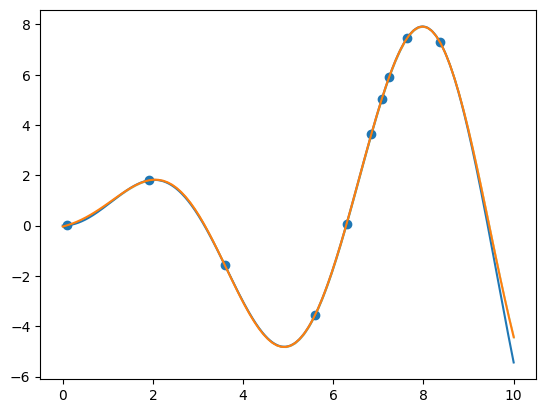

In [116]:
# importing relevant libraries
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# defining my own domain
x_min = 0
x_max = 10


# defining my own function
def my_func(x):
    y = x*np.sin(x)
    return y

# Defining the radial basis function
def my_rbf(x1,x2, length_scale):
    ls = length_scale 
    my_kernel = np.exp(-np.square(x1-x2)/(2*np.square(ls)))
    return my_kernel

# Defining the co-relation matrix:
# let x_train, x_pred be an array of values
def my_cor_mat(x1,x2):
    cor_mat = np.zeros([np.size(x1),np.size(x2)])
    for _ in range(np.size(x1)):
        for __ in range(np.size(x2)):
            cor_mat[_][__]=my_rbf(x1[_],x2[__],0.2)
    return cor_mat

# defining the input data
n_train = 10
n_total = 1000
## Definig the actual function
x_actual = np.linspace(x_min,x_max,n_total)
y_actual = my_func(x_actual)
## Defining the training data
np.random.seed(0)
x_train_indices = np.random.randint(0,n_total,n_train)
x_train = x_actual[x_train_indices]
y_train = my_func(x_train)
## Visualising the actual function and the training data
plt.plot(x_actual,y_actual)
plt.scatter(x_train,y_train)

# defining the new data
n_pred = 100
x_pred = np.linspace(x_min,x_max,n_pred)
## defining the scaler
scaler = MinMaxScaler()
scaler.fit(x_train.reshape(-1,1))
x_train_scaled = scaler.transform(x_train.reshape(-1,1))
x_train_scaled = x_train_scaled.reshape(1,-1)[0]
x_pred_scaled = scaler.transform(x_pred.reshape(-1,1))
x_pred_scaled = x_pred_scaled.reshape(1,-1)[0]

# GPR
## obtaining the correlation_matrices 
A = my_cor_mat(x_train_scaled,x_train_scaled)
B = my_cor_mat(x_pred_scaled,x_pred_scaled)
C = my_cor_mat(x_train_scaled,x_pred_scaled)
## some matrix operations
C_tps = np.transpose(C)
A_inv = np.linalg.inv(A)
X = y_train.reshape(-1,1)
## Evaluating Mean
mean = np.matmul(C_tps,np.matmul(A_inv,X))
mean=mean.reshape(1,-1)[0]
std = np.diag(B- C_tps@A_inv@C)
#Plotting the mean
plt.plot(x_pred,mean)
plt.fill_between(x_pred,mean+1.61*std,mean-1.61*std,alpha=0.2,color="green")

## Verify
Lets verify if we would get the same with the libraries used

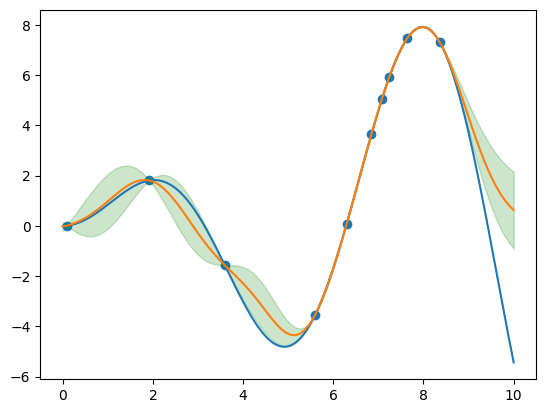

In [117]:
# importing the libraries
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF

kernel = RBF(length_scale=0.1)
model = GPR(kernel=kernel,optimizer=None,n_restarts_optimizer=10)
model.fit(x_train_scaled.reshape(-1,1), y_train)
mean_verify, std_verify = model.predict(x_pred_scaled.reshape(-1,1),return_std=True)

## Visualising the actual function and the training data
plt.plot(x_actual,y_actual)
plt.scatter(x_train,y_train)
#Plotting the mean
plt.plot(x_pred,mean_verify)
plt.fill_between(x_pred,mean_verify+1.61*std_verify,mean_verify-1.61*std_verify,alpha=0.2,color="green")

## Therefore as they look very identical i believe my understanding about GPR is right.